<a href="https://colab.research.google.com/github/DenyT17/Football_Object_Detection/blob/main/Football_Object_Detection_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics
import math
from typing import Generator
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
import cv2
from google.colab import drive
%matplotlib inline

drive.mount('/content/gdrive')

ROOT_DIR = '/content/gdrive/My Drive/Football_Detection'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
model = YOLO("/content/gdrive/My Drive/Football_Detection/runs/detect/train2/weights/best.pt")

In [16]:
video = "/content/gdrive/My Drive/Football_Detection/video/Why Teamwork is important in Football.mp4"


In [4]:
from __future__ import annotations
from dataclasses import dataclass, field
from typing import Tuple, Optional, List, Dict, Any

def drawRectange(image, results, thickness) -> np.ndarray:
  colors = [(255, 0, 0),(0, 255, 255),(255, 102, 0),(255, 0, 255)]
  for r in results:
        boxes = r.boxes
        for box in boxes:
            # Getting x and y coordination of objects
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            # Getting confident and name of detected objects.
            conf = math.ceil((box.conf[0] * 100)) / 100
            cls = int(box.cls[0])
            # Showing detected object and information about they
            cv2.rectangle(image, (x1, y1), (x2, y2), colors[cls], thickness)
  return image


In [ ]:
import os
video_path = os.path.join(video)
video_path_out = '{}_out.mp4'.format(video_path)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))
# Load a model
colors = [(255, 0, 0),(0, 255, 255),(255, 102, 0),(255, 0, 255)]
classNames = ['ball', 'goalkeeper', 'player', 'referee']
while ret:
    results = model(frame)[0]
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Getting x and y coordination of objects
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            # Getting confident and name of detected objects.
            conf = math.ceil((box.conf[0] * 100)) / 100
            cls = int(box.cls[0])
            # Showing detected object and information about they
            cv2.rectangle(frame, (x1, y1), (x2, y2), colors[cls], 5)
            cv2.putText(frame, f'{classNames[cls]}{conf}', (max(0, x1), max(40, y1 - 30)), 5, 1, colors[cls])
    out.write(frame)
    ret, frame = cap.read()
cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
@dataclass(frozen=True)
class Object(self):
    x: float
    y: float
    width: float
    height: float

    @property
    def min_x(self) -> float:
        return self.x
    
    @property
    def min_y(self) -> float:
        return self.y
    
    @property
    def max_x(self) -> float:
        return self.x + self.width
    
    @property
    def max_y(self) -> float:
        return self.y + self.height
        
    @property
    def top_left(self) -> Point:
        return Point(x=self.x, y=self.y)
    
    @property
    def bottom_right(self) -> Point:
        return Point(x=self.x + self.width, y=self.y + self.height)

    @property
    def bottom_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height)

    @property
    def top_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y)

    @property
    def center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height / 2)

    def pad(self, padding: float) -> Rect:
        return Rect(
            x=self.x - padding, 
            y=self.y - padding,
            width=self.width + 2*padding,
            height=self.height + 2*padding
        )
    
    def contains_point(self, point: Point) -> bool:
        return self.min_x < point.x < self.max_x and self.min_y < point.y < self.max_y


0: 640x640 1 goalkeeper, 19 players, 2 referees, 35.8ms
Speed: 0.7ms preprocess, 35.8ms inference, 39.7ms postprocess per image at shape (1, 3, 640, 640)


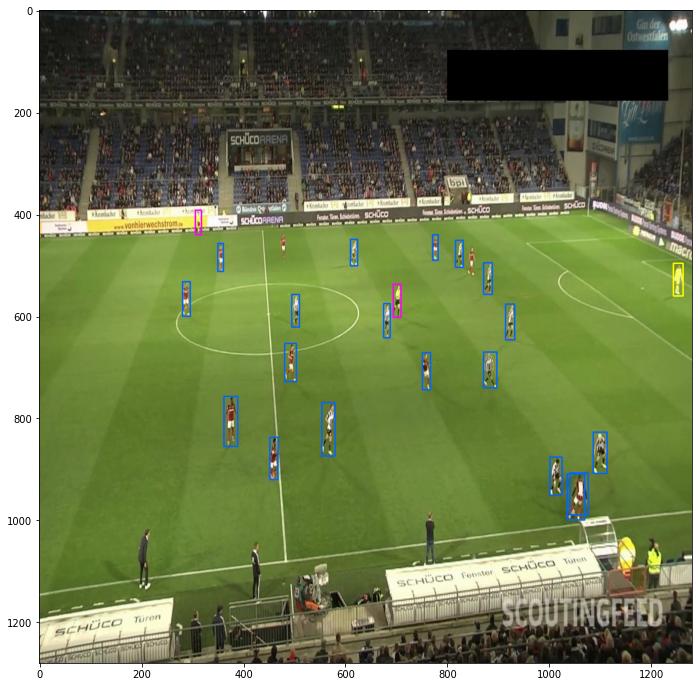

In [5]:
import os

img = cv2.imread("/content/gdrive/My Drive/Football_Detection/test/images/744b27_1_10_png.rf.322f9266079f0424f6aebb23c23cc6de.jpg")
pred = model(img)
image = drawRectange(img,pred,2)
plt.figure(figsize=(12, 12))
plt.imshow(image[...,::-1])
plt.show()